# **Import Libraries and Install pmdarima**

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta


# **Read the CSV File and Get Basic Information about the DataFrame**

In [ ]:
# Read the CSV file
NDVI = pd.read_csv('/content/NDVI.csv')

# Get the number of columns
num_columns = NDVI.shape[1]

# Get the number of rows
num_rows = NDVI.shape[0]

# Display the first 5 rows of the dataframe
head_NDVI = NDVI.head(5) # you can use any number in place of 5 to see data

# Get the column names
col_NAMES = NDVI.columns

# Output results
print(f"Number of columns: {num_columns}")
print(f"Number of rows: {num_rows}")
print(f"First 5 rows:\n{head_NDVI}")
print(f"Column names: {col_NAMES}")


Number of columns: 1044
Number of rows: 26
First 5 rows:
  system:index  1_2005_01_01_1_2005_01_01_p10  1_2005_01_01_1_2005_01_01_p20  \
0            0                       0.283021                       0.322458   
1            1                       0.365376                       0.396478   
2            2                       0.191486                       0.199272   
3            3                       0.314641                       0.346386   
4           12                       0.217600                       0.298533   

   1_2005_01_01_1_2005_01_01_p30  1_2005_01_01_1_2005_01_01_p40  \
0                       0.349318                       0.369065   
1                       0.416014                       0.431613   
2                       0.206989                       0.214838   
3                       0.368920                       0.400233   
4                       0.321400                       0.354067   

   1_2005_01_01_1_2005_01_01_p50  1_2005_01_01_1_2005_01_01

### **Data tranformation and aggregation**



In [ ]:
# Check the type of an object
type_of_object = type(col_NAMES)

# Check if it is a vector (in Python, lists and arrays can be considered as vectors)
is_vector = isinstance(col_NAMES, (list, pd.Index))  # pd.Index is used for pandas column names which is an Index object

# Example with a boolean
a = True
class_a = type(a)

# Display the last few elements (similar to tail in R)
tail_col_NAMES = col_NAMES[-5:]

# Output results
print(f"Type of col_NAMES: {type_of_object}")
print(f"Is col_NAMES a vector: {is_vector}")
print(f"Class of a: {class_a}")
print(f"Last few elements of col_NAMES: {tail_col_NAMES}")


Type of col_NAMES: <class 'pandas.core.indexes.base.Index'>
Is col_NAMES a vector: True
Class of a: <class 'bool'>
Last few elements of col_NAMES: Index(['NAME', 'PARILAMENT', 'POPULATION', 'REVENUE_DI', '.geo'], dtype='object')


In [ ]:
# Filter out rows where NAME is not NA (Not applicable as in pandas, 'NAME' must be present

# Select all columns except '.geo'
data1 = NDVI.drop(columns=['.geo'])

# Display the first few rows of data1 (similar to head)
print(data1.head())

# Display the column names of data1
print(data1.columns)

# Get the number of unique values in the 'NAME' column
num_unique_names = data1['NAME'].nunique()

# Output the number of unique names
print(f"Number of unique names: {num_unique_names}")

# Select columns that match the pattern "^\d" (start with a digit) or start with "N"
data2 = data1.loc[:, data1.columns.str.match(r'^\d') | data1.columns.str.startswith('N')]

# Display the column names of data2
print(data2.columns)


  system:index  1_2005_01_01_1_2005_01_01_p10  1_2005_01_01_1_2005_01_01_p20  \
0            0                       0.283021                       0.322458   
1            1                       0.365376                       0.396478   
2            2                       0.191486                       0.199272   
3            3                       0.314641                       0.346386   
4           12                       0.217600                       0.298533   

   1_2005_01_01_1_2005_01_01_p30  1_2005_01_01_1_2005_01_01_p40  \
0                       0.349318                       0.369065   
1                       0.416014                       0.431613   
2                       0.206989                       0.214838   
3                       0.368920                       0.400233   
4                       0.321400                       0.354067   

   1_2005_01_01_1_2005_01_01_p50  1_2005_01_01_1_2005_01_01_p60  \
0                       0.388213                 

In [ ]:

# Melt the DataFrame to gather columns into key-value pairs
data3 = pd.melt(data1, id_vars=['NAME'], var_name='Year', value_name='NDVI')

# Get the number of unique values in the 'NAME' column
num_unique_names_data3 = data3['NAME'].nunique()

# Display the first few rows of data3 (similar to head in R)
print(data3.head())

# Display the last few rows of data3 (similar to tail in R)
print(data3.tail())

# Add a new column by extracting substring from 'Year' column
data3['new_col'] = data3['Year'].str[-14:]

# Display the first few rows after mutation
print(data3.head())

# Display the last few rows after mutation
print(data3.tail())

# Remove the 'Year' column
data3 = data3.drop(columns=['Year'])

# Output results
print(f"Number of unique names in data3: {num_unique_names_data3}")
print(f"Column names after gather and mutate:\n{data3.columns}")
print(f"First few rows of data3 after mutation and dropping 'Year' column:\n{data3.head()}")
print(f"Last few rows of data3 after mutation and dropping 'Year' column:\n{data3.tail()}")


                            NAME          Year NDVI
0                      KonaSeema  system:index    0
1                     Anakapalli  system:index    1
2                   Ananthapuram  system:index    2
3  AlluriSitharama Raju District  system:index    3
4                Manyam District  system:index   12
                NAME        Year                                          NDVI
27087   NTR District  REVENUE_DI  Vijayawada(6),Nandigama(7)(N),Tiruvuru(6)(N)
27088  Visakhapatnam  REVENUE_DI          Visakhapatnam(5),Bhimunipatnam(5)(N)
27089   Vizianagaram  REVENUE_DI               Vizianagaram(15),Bobbili(11)(N)
27090  West Godavari  REVENUE_DI             Bheemavaram(11)(N),Narasapuram(8)
27091  East Godavari  REVENUE_DI                    Rajahmundry(10),Kovvur(10)
                            NAME          Year NDVI       new_col
0                      KonaSeema  system:index    0  system:index
1                     Anakapalli  system:index    1  system:index
2               

In [ ]:
# Separate the 'new_col' column into multiple columns
data3[['Year', 'Month', 'Day', 'Quantile']] = data3['new_col'].str.split('_', expand=True)

# Display the first few rows after separation (similar to head in R)
print(data3.head())

# Display the last few rows after separation (similar to tail in R)
print(data3.tail())


                            NAME NDVI       new_col          Year Month   Day  \
0                      KonaSeema    0  system:index  system:index  None  None   
1                     Anakapalli    1  system:index  system:index  None  None   
2                   Ananthapuram    2  system:index  system:index  None  None   
3  AlluriSitharama Raju District    3  system:index  system:index  None  None   
4                Manyam District   12  system:index  system:index  None  None   

  Quantile  
0     None  
1     None  
2     None  
3     None  
4     None  
                NAME                                          NDVI  \
27087   NTR District  Vijayawada(6),Nandigama(7)(N),Tiruvuru(6)(N)   
27088  Visakhapatnam          Visakhapatnam(5),Bhimunipatnam(5)(N)   
27089   Vizianagaram               Vizianagaram(15),Bobbili(11)(N)   
27090  West Godavari             Bheemavaram(11)(N),Narasapuram(8)   
27091  East Godavari                    Rajahmundry(10),Kovvur(10)   

          new_

In [ ]:
# Get the column names of the NDVI DataFrame
ndvi_columns = NDVI.columns

# Display the column names
print(ndvi_columns)

# Display the first few column names (similar to head in R)
print(ndvi_columns[:5])

# Display the last few column names (similar to tail in R)
print(ndvi_columns[-5:])


Index(['system:index', '1_2005_01_01_1_2005_01_01_p10',
       '1_2005_01_01_1_2005_01_01_p20', '1_2005_01_01_1_2005_01_01_p30',
       '1_2005_01_01_1_2005_01_01_p40', '1_2005_01_01_1_2005_01_01_p50',
       '1_2005_01_01_1_2005_01_01_p60', '1_2005_01_01_1_2005_01_01_p70',
       '1_2005_01_01_1_2005_01_01_p80', '1_2005_01_01_1_2005_01_01_p90',
       ...
       '2_2_2_2_1_2001_12_19_2_2_2_2_1_2001_12_19_p80',
       '2_2_2_2_1_2001_12_19_2_2_2_2_1_2001_12_19_p90', 'AREA', 'CAPITAL',
       'CODE', 'NAME', 'PARILAMENT', 'POPULATION', 'REVENUE_DI', '.geo'],
      dtype='object', length=1044)
Index(['system:index', '1_2005_01_01_1_2005_01_01_p10',
       '1_2005_01_01_1_2005_01_01_p20', '1_2005_01_01_1_2005_01_01_p30',
       '1_2005_01_01_1_2005_01_01_p40'],
      dtype='object')
Index(['NAME', 'PARILAMENT', 'POPULATION', 'REVENUE_DI', '.geo'], dtype='object')


In [ ]:
# Select columns based on the pattern
pattern = re.compile(r"[A-Za-z].*\d|\d.*[A-Za-z]|[A-Za-z]")
ndvi_columns = [col for col in NDVI.columns if pattern.search(col)]

# Display the first few selected columns (similar to head in R)
print(ndvi_columns[:5])


['system:index', '1_2005_01_01_1_2005_01_01_p10', '1_2005_01_01_1_2005_01_01_p20', '1_2005_01_01_1_2005_01_01_p30', '1_2005_01_01_1_2005_01_01_p40']


In [ ]:
# Select columns based on the pattern
pattern = re.compile(r"p\d+")
ndvi_columns = [col for col in NDVI.columns if pattern.search(col)]

# Display the first few selected columns (similar to head in R)
print(ndvi_columns[:5])


['1_2005_01_01_1_2005_01_01_p10', '1_2005_01_01_1_2005_01_01_p20', '1_2005_01_01_1_2005_01_01_p30', '1_2005_01_01_1_2005_01_01_p40', '1_2005_01_01_1_2005_01_01_p50']


In [ ]:
# Transform the DataFrame to long format with NDVI values
NDVI_long = NDVI.melt(id_vars=['system:index', 'AREA', 'CAPITAL', 'CODE', 'NAME', 'PARILAMENT', 'POPULATION', 'REVENUE_DI'],
                      value_vars=ndvi_columns,
                      var_name='Date_Percentile',
                      value_name='NDVI_Value')

# Display the first few rows of the transformed DataFrame
print(NDVI_long.head())


  system:index          AREA        CAPITAL  CODE  \
0            0   2615 SQ KM2     Amalapuram     8   
1            1   4412 SQ KM2     Anakapalli     6   
2            2  11359 SQ KM2   Ananthapuram    21   
3            3  12251 SQ KM2         Paderu     4   
4           12   3935 SQ KM2  Parvathipuram     3   

                            NAME       PARILAMENT   POPULATION  \
0                      KonaSeema  Amalapuram (sc)  18.73 LAKHS   
1                     Anakapalli       Anakapalli  18.73 LAKHS   
2                   Ananthapuram     Ananthapuram  23.59 LAKHS   
3  AlluriSitharama Raju District       Araku (ST)   9.54 LAKHS   
4                Manyam District       Araku (ST)   9.72 LAKHS   

                                          REVENUE_DI  \
0                        Ramachandrapuram,Amalapuram   
1                     Narsipatnam(10),Anakapalli(15)   
2  Ananthapuram(14),Kalyanadurgam(12),Guntakal(8)(N)   
3                  Paderu(11)(N),Rampachodavaram(11)   
4   

In [ ]:
# Extract year, month, day, and percentile from the 'Date_Percentile' column
NDVI_long['Year'] = NDVI_long['Date_Percentile'].str.extract(r'(\d{4})')
NDVI_long['Month'] = NDVI_long['Date_Percentile'].str.extract(r'_(\d{2})_').replace('_', '', regex=True)
NDVI_long['Day'] = NDVI_long['Date_Percentile'].str.extract(r'_(\d{2})_(\d{2})')[1]
NDVI_long['Percentile'] = NDVI_long['Date_Percentile'].str.extract(r'p(\d+)')

# Display the first few rows after extraction
print(NDVI_long.head())


  system:index          AREA        CAPITAL  CODE  \
0            0   2615 SQ KM2     Amalapuram     8   
1            1   4412 SQ KM2     Anakapalli     6   
2            2  11359 SQ KM2   Ananthapuram    21   
3            3  12251 SQ KM2         Paderu     4   
4           12   3935 SQ KM2  Parvathipuram     3   

                            NAME       PARILAMENT   POPULATION  \
0                      KonaSeema  Amalapuram (sc)  18.73 LAKHS   
1                     Anakapalli       Anakapalli  18.73 LAKHS   
2                   Ananthapuram     Ananthapuram  23.59 LAKHS   
3  AlluriSitharama Raju District       Araku (ST)   9.54 LAKHS   
4                Manyam District       Araku (ST)   9.72 LAKHS   

                                          REVENUE_DI  \
0                        Ramachandrapuram,Amalapuram   
1                     Narsipatnam(10),Anakapalli(15)   
2  Ananthapuram(14),Kalyanadurgam(12),Guntakal(8)(N)   
3                  Paderu(11)(N),Rampachodavaram(11)   
4   

In [ ]:
# Select and rename columns to focus on district, year, month, day, percentile, and NDVI value
df_detailed = NDVI_long[['NAME', 'Year', 'Month', 'Day', 'Percentile', 'NDVI_Value']].rename(columns={
    'NAME': 'District'
})

# Display the first few rows of the detailed DataFrame
print(df_detailed.head())


                        District  Year Month Day Percentile  NDVI_Value
0                      KonaSeema  2005    01  01         10    0.283021
1                     Anakapalli  2005    01  01         10    0.365376
2                   Ananthapuram  2005    01  01         10    0.191486
3  AlluriSitharama Raju District  2005    01  01         10    0.314641
4                Manyam District  2005    01  01         10    0.217600


In [ ]:
# View the first few rows of the transformed dataframe
print(df_detailed.head())

# Unite date columns
df_detailed['date'] = df_detailed['Year'] + '_' + df_detailed['Month'] + '_' + df_detailed['Day']

# Select columns
New = df_detailed.drop(columns=['Percentile'])

# Group by and summarize
New_names = New.groupby(['District', 'Year', 'Month']).agg(Count=('Day', 'nunique')).reset_index()

# Display the first few rows of the new dataframe
print(New_names.head())


                        District  Year Month Day Percentile  NDVI_Value
0                      KonaSeema  2005    01  01         10    0.283021
1                     Anakapalli  2005    01  01         10    0.365376
2                   Ananthapuram  2005    01  01         10    0.191486
3  AlluriSitharama Raju District  2005    01  01         10    0.314641
4                Manyam District  2005    01  01         10    0.217600
                        District  Year Month  Count
0  AlluriSitharama Raju District  2001    01      2
1  AlluriSitharama Raju District  2001    02      2
2  AlluriSitharama Raju District  2001    03      2
3  AlluriSitharama Raju District  2001    04      2
4  AlluriSitharama Raju District  2001    05      2


In [ ]:
# Get unique districts and their count
District = New['District'].unique()
num_districts = len(District)
print(f"Number of unique districts: {num_districts}")

# Create a date column
df_detailed['date'] = pd.to_datetime(df_detailed[['Year', 'Month', 'Day']])

# Mutate dataframe to add 'percentile' column
df_detailed['percentile'] = 'p' + df_detailed['Percentile']

# Display the first few rows after mutation
print(df_detailed.head())


Number of unique districts: 26
                        District  Year Month Day Percentile  NDVI_Value  \
0                      KonaSeema  2005    01  01         10    0.283021   
1                     Anakapalli  2005    01  01         10    0.365376   
2                   Ananthapuram  2005    01  01         10    0.191486   
3  AlluriSitharama Raju District  2005    01  01         10    0.314641   
4                Manyam District  2005    01  01         10    0.217600   

        date percentile  
0 2005-01-01        p10  
1 2005-01-01        p10  
2 2005-01-01        p10  
3 2005-01-01        p10  
4 2005-01-01        p10  


In [ ]:
# Calculate the mean NDVI for all percentiles
df_mean = df_detailed.groupby(['District', 'date']).agg(mean_ndvi=('NDVI_Value', 'mean')).reset_index()

# Display the first few rows of the mean NDVI DataFrame
print(df_mean.head())


                        District       date  mean_ndvi
0  AlluriSitharama Raju District 2001-01-01   0.511561
1  AlluriSitharama Raju District 2001-01-17   0.436955
2  AlluriSitharama Raju District 2001-02-02   0.393771
3  AlluriSitharama Raju District 2001-02-18   0.377414
4  AlluriSitharama Raju District 2001-03-06   0.276467


In [ ]:
# Filter the dataframe for the target district "Bapatla"
target_district_data = df_detailed[df_detailed['District'] == "Bapatla"]

# Display the first few rows of the target district data
print(target_district_data.head())


    District  Year Month Day Percentile  NDVI_Value       date percentile
5    Bapatla  2005    01  01         10    0.353215 2005-01-01        p10
31   Bapatla  2005    01  01         20    0.389130 2005-01-01        p20
57   Bapatla  2005    01  01         30    0.419958 2005-01-01        p30
83   Bapatla  2005    01  01         40    0.447372 2005-01-01        p40
109  Bapatla  2005    01  01         50    0.474683 2005-01-01        p50


In [ ]:
# Calculate the mean NDVI value
mean_value = target_district_data['NDVI_Value'].mean()

# Calculate the mode NDVI value
mode_value = target_district_data['NDVI_Value'].mode().iloc[0]  # mode() returns a series, use .iloc[0] to get the first mode

# Calculate the median NDVI value
median_value = target_district_data['NDVI_Value'].median()

# Output the results
print(f"Mean NDVI value: {mean_value}")
print(f"Mode NDVI value: {mode_value}")
print(f"Median NDVI value: {median_value}")


Mean NDVI value: 0.4514928989536688
Mode NDVI value: 0.4555
Median NDVI value: 0.4237926958


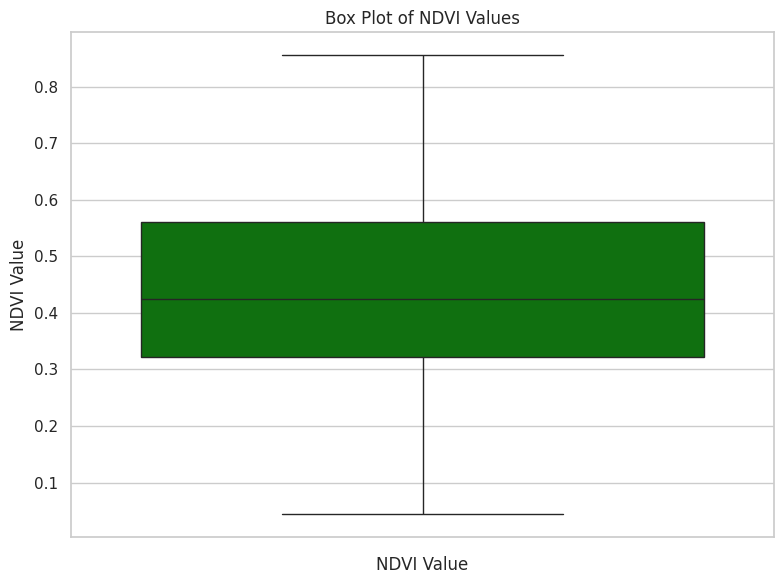

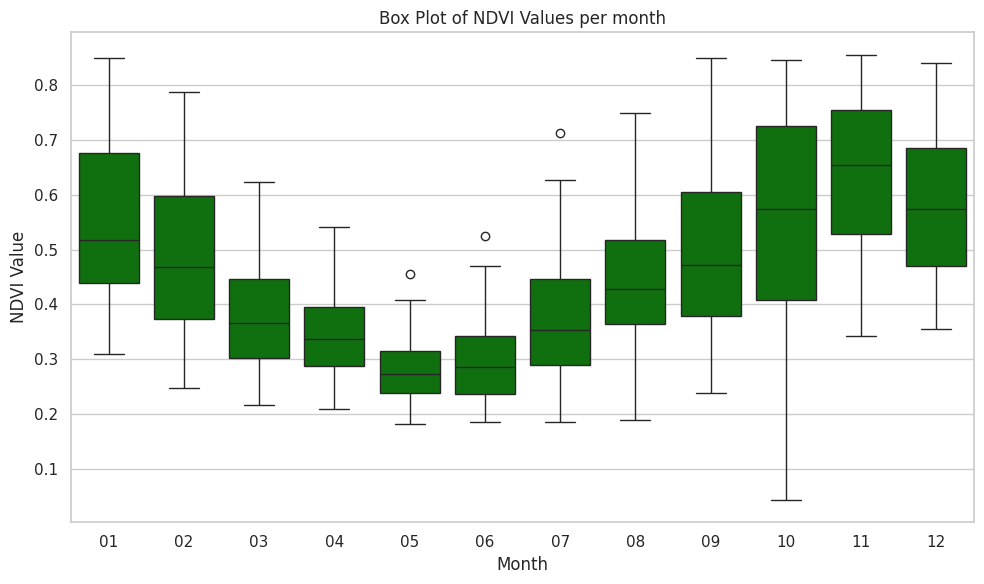

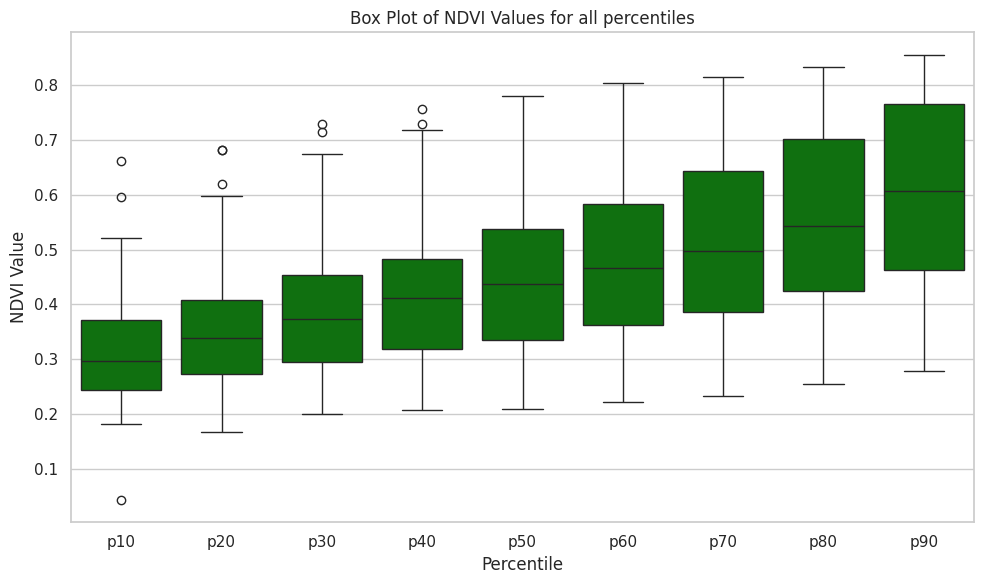

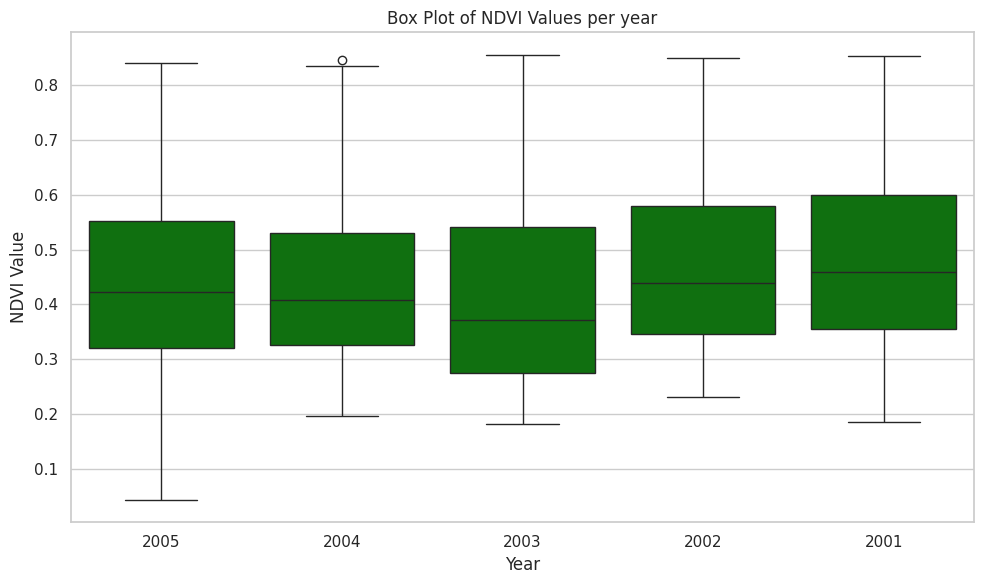

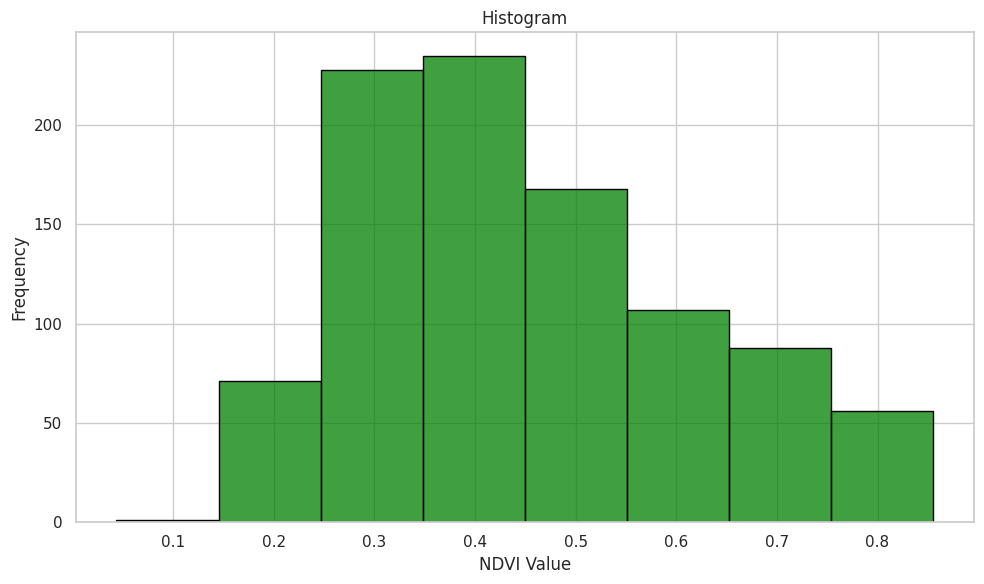

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=target_district_data['NDVI_Value'], color="green")
plt.title("Box Plot of NDVI Values")
plt.xlabel("NDVI Value")
plt.ylabel("NDVI Value")
plt.tight_layout()

# Show the plot
plt.show()
# BOX PLOT of per month NDVI_Values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='NDVI_Value', data=target_district_data, color="green")
plt.title("Box Plot of NDVI Values per month")
plt.xlabel("Month")
plt.ylabel("NDVI Value")
plt.tight_layout()
plt.show()

# BOX PLOT of NDVI_Values for all percentile
plt.figure(figsize=(10, 6))
sns.boxplot(x='percentile', y='NDVI_Value', data=target_district_data, color="green")
plt.title("Box Plot of NDVI Values for all percentiles")
plt.xlabel("Percentile")
plt.ylabel("NDVI Value")
plt.tight_layout()
plt.show()

# BOX PLOT of NDVI_Values per year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='NDVI_Value', data=target_district_data, color="green")
plt.title("Box Plot of NDVI Values per year")
plt.xlabel("Year")
plt.ylabel("NDVI Value")
plt.tight_layout()
plt.show()

# HISTOGRAM
plt.figure(figsize=(10, 6))
sns.histplot(target_district_data['NDVI_Value'], bins=int((target_district_data['NDVI_Value'].max() - target_district_data['NDVI_Value'].min()) / 0.1), kde=False, color="green", edgecolor="black")
plt.title("Histogram")
plt.xlabel("NDVI Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Filter rows where mean_ndvi is NaN
NAs = df_mean[df_mean['mean_ndvi'].isna()]

# Fill missing values in mean_ndvi column (downward direction)
df_mean_filled = df_mean.fillna(method='ffill')

# Filter rows where mean_ndvi is still NaN after filling
NAs_not_filled = df_mean_filled[df_mean_filled['mean_ndvi'].isna()]

# Display the results
print("Rows with NaN in mean_ndvi before filling:")
print(NAs)

print("\nRows with NaN in mean_ndvi after filling:")
print(NAs_not_filled)


Rows with NaN in mean_ndvi before filling:
                           District       date  mean_ndvi
10    AlluriSitharama Raju District 2001-06-10        NaN
11    AlluriSitharama Raju District 2001-06-26        NaN
57    AlluriSitharama Raju District 2003-06-26        NaN
58    AlluriSitharama Raju District 2003-07-12        NaN
82    AlluriSitharama Raju District 2004-07-27        NaN
...                             ...        ...        ...
2750                  West Godavari 2005-07-28        NaN
2770                     YSR Kadapa 2001-06-10        NaN
2771                     YSR Kadapa 2001-06-26        NaN
2793                     YSR Kadapa 2002-06-10        NaN
2885    sri potti sriramulu Nellore 2001-06-10        NaN

[136 rows x 3 columns]

Rows with NaN in mean_ndvi after filling:
Empty DataFrame
Columns: [District, date, mean_ndvi]
Index: []


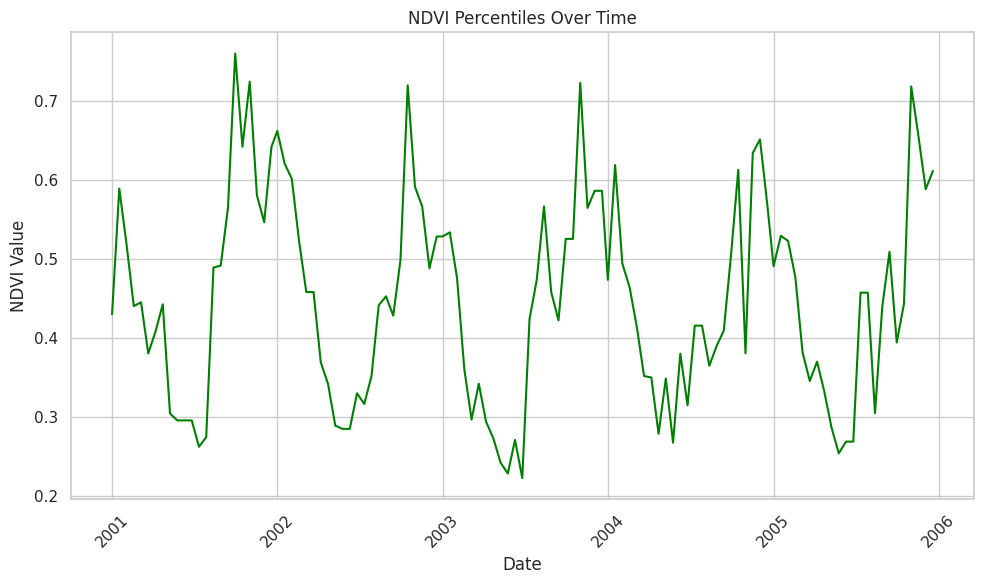

In [ ]:
# Filter the data for the 'Bapatla' district
bapatla_data_filled = df_mean_filled[df_mean_filled['District'] == 'Bapatla']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for mean NDVI values over time after filling missing values
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='mean_ndvi', data=bapatla_data_filled, color='green')
plt.title("NDVI Percentiles Over Time")
plt.xlabel("Date")
plt.ylabel("NDVI Value")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Clean the NDVI_Value column by removing NaN values
cleaned_data = target_district_data['NDVI_Value'].dropna()

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cleaned_data.quantile(0.25)
Q3 = cleaned_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Output the results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Q1: 0.32220942392499996
Q3: 0.560505448325
IQR: 0.23829602440000008
Lower bound for outliers: -0.035234612675000165
Upper bound for outliers: 0.9179494849250002


In [ ]:
# Assuming the necessary calculations and cleaned_data are already done

# Identify outliers
outliers = cleaned_data[(cleaned_data < lower_bound) | (cleaned_data > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

# Calculate the 10th and 90th percentiles
percentiles = cleaned_data.quantile([0.1, 0.9])

# Print the percentiles
print("10th and 90th percentiles:")
print(percentiles)


Outliers:
Series([], Name: NDVI_Value, dtype: float64)
10th and 90th percentiles:
0.1    0.258720
0.9    0.707014
Name: NDVI_Value, dtype: float64


In [ ]:
# Convert the data frame from long format to wide format according to percentile
df_wide = df_detailed.pivot(index=['District', 'date', 'Year', 'Month', 'Day'], columns='percentile', values='NDVI_Value').reset_index()

# Display the first few rows of the wide format DataFrame
print(df_wide.head())


percentile                       District       date  Year Month Day  \
0           AlluriSitharama Raju District 2001-01-01  2001    01  01   
1           AlluriSitharama Raju District 2001-01-17  2001    01  17   
2           AlluriSitharama Raju District 2001-02-02  2001    02  02   
3           AlluriSitharama Raju District 2001-02-18  2001    02  18   
4           AlluriSitharama Raju District 2001-03-06  2001    03  06   

percentile       p10       p20       p30       p40       p50       p60  \
0           0.372980  0.408236  0.435353  0.463243  0.490259  0.525173   
1           0.318183  0.353360  0.373032  0.388855  0.408293  0.439588   
2           0.298982  0.322072  0.341875  0.357572  0.372850  0.392410   
3           0.259629  0.299382  0.333886  0.346098  0.369563  0.396547   
4           0.258600  0.264800  0.266200  0.268600  0.272400  0.275200   

percentile       p70       p80       p90  
0           0.571814  0.631583  0.705408  
1           0.482496  0.536976  0.63

In [ ]:
# Fill missing values in the p10 and p90 columns (downward direction)
df_wide_filled = df_wide.copy()
df_wide_filled[['p10', 'p90']] = df_wide_filled[['p10', 'p90']].fillna(method='ffill')

# Display the first few rows of the filled DataFrame
print(df_wide_filled.head())


percentile                       District       date  Year Month Day  \
0           AlluriSitharama Raju District 2001-01-01  2001    01  01   
1           AlluriSitharama Raju District 2001-01-17  2001    01  17   
2           AlluriSitharama Raju District 2001-02-02  2001    02  02   
3           AlluriSitharama Raju District 2001-02-18  2001    02  18   
4           AlluriSitharama Raju District 2001-03-06  2001    03  06   

percentile       p10       p20       p30       p40       p50       p60  \
0           0.372980  0.408236  0.435353  0.463243  0.490259  0.525173   
1           0.318183  0.353360  0.373032  0.388855  0.408293  0.439588   
2           0.298982  0.322072  0.341875  0.357572  0.372850  0.392410   
3           0.259629  0.299382  0.333886  0.346098  0.369563  0.396547   
4           0.258600  0.264800  0.266200  0.268600  0.272400  0.275200   

percentile       p70       p80       p90  
0           0.571814  0.631583  0.705408  
1           0.482496  0.536976  0.63

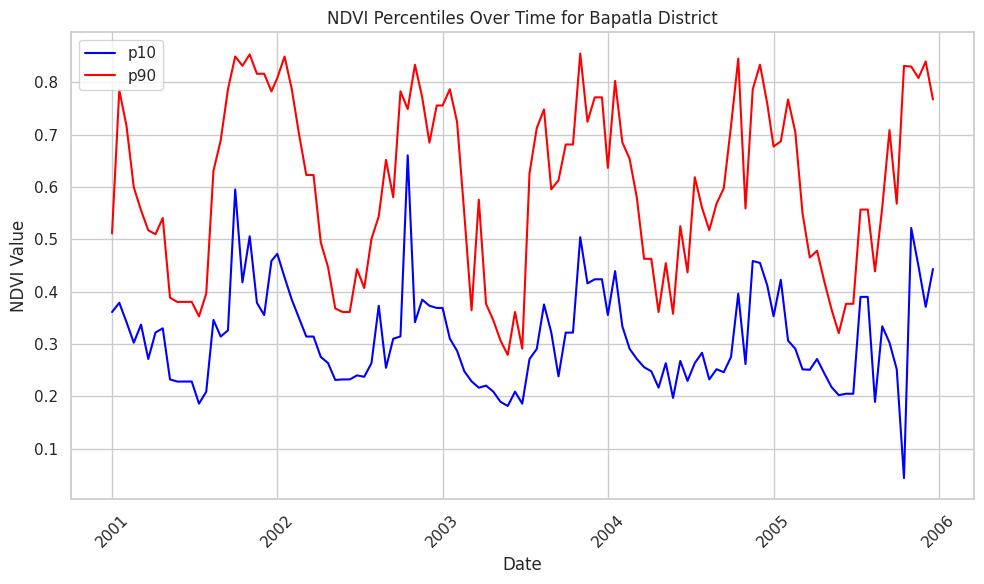

In [ ]:
# Filter the data for the 'Bapatla' district
bapatla_data_wide_filled = df_wide_filled[df_wide_filled['District'] == 'Bapatla']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for NDVI percentiles over time after filling missing values
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='p10', data=bapatla_data_wide_filled, color='blue', label='p10')
sns.lineplot(x='date', y='p90', data=bapatla_data_wide_filled, color='red', label='p90')
plt.title("NDVI Percentiles Over Time for Bapatla District")
plt.xlabel("Date")
plt.ylabel("NDVI Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Convert date to numeric (days since start)
df_mean['date_numeric'] = (df_mean['date'] - df_mean['date'].min()).dt.days

# Calculate cosine and sine components
df_mean['cos'] = np.cos(2 * np.pi * df_mean['date_numeric'] / 365.25)
df_mean['sin'] = np.sin(2 * np.pi * df_mean['date_numeric'] / 365.25)

# Fill NaN values in mean_ndvi column using forward fill
df_mean['mean_ndvi'] = df_mean['mean_ndvi'].fillna(method='ffill')

# Ensure no remaining NaN values in mean_ndvi
df_mean['mean_ndvi'] = df_mean['mean_ndvi'].fillna(method='bfill')

# Define the independent variables (features) and the dependent variable (target)
X = df_mean[['date_numeric', 'cos', 'sin']]
y = df_mean['mean_ndvi']

# Fit the harmonic model using linear regression
harmonic_model = LinearRegression().fit(X, y)

# Print model summary
print("Intercept:", harmonic_model.intercept_)
print("Coefficients:", harmonic_model.coef_)

# Predict fitted values
df_mean['fitted'] = harmonic_model.predict(X)

# Display the first few rows of the DataFrame with fitted values
print(df_mean.head())


Intercept: 0.43507680712099756
Coefficients: [ 3.30934028e-06  4.37968682e-02 -1.09397341e-01]
                        District       date  mean_ndvi  date_numeric  \
0  AlluriSitharama Raju District 2001-01-01   0.511561             0   
1  AlluriSitharama Raju District 2001-01-17   0.436955            16   
2  AlluriSitharama Raju District 2001-02-02   0.393771            32   
3  AlluriSitharama Raju District 2001-02-18   0.377414            48   
4  AlluriSitharama Raju District 2001-03-06   0.276467            64   

        cos       sin    fitted  
0  1.000000  0.000000  0.478874  
1  0.962360  0.271777  0.447546  
2  0.852275  0.523094  0.415285  
3  0.678031  0.735034  0.384521  
4  0.452745  0.891640  0.357574  


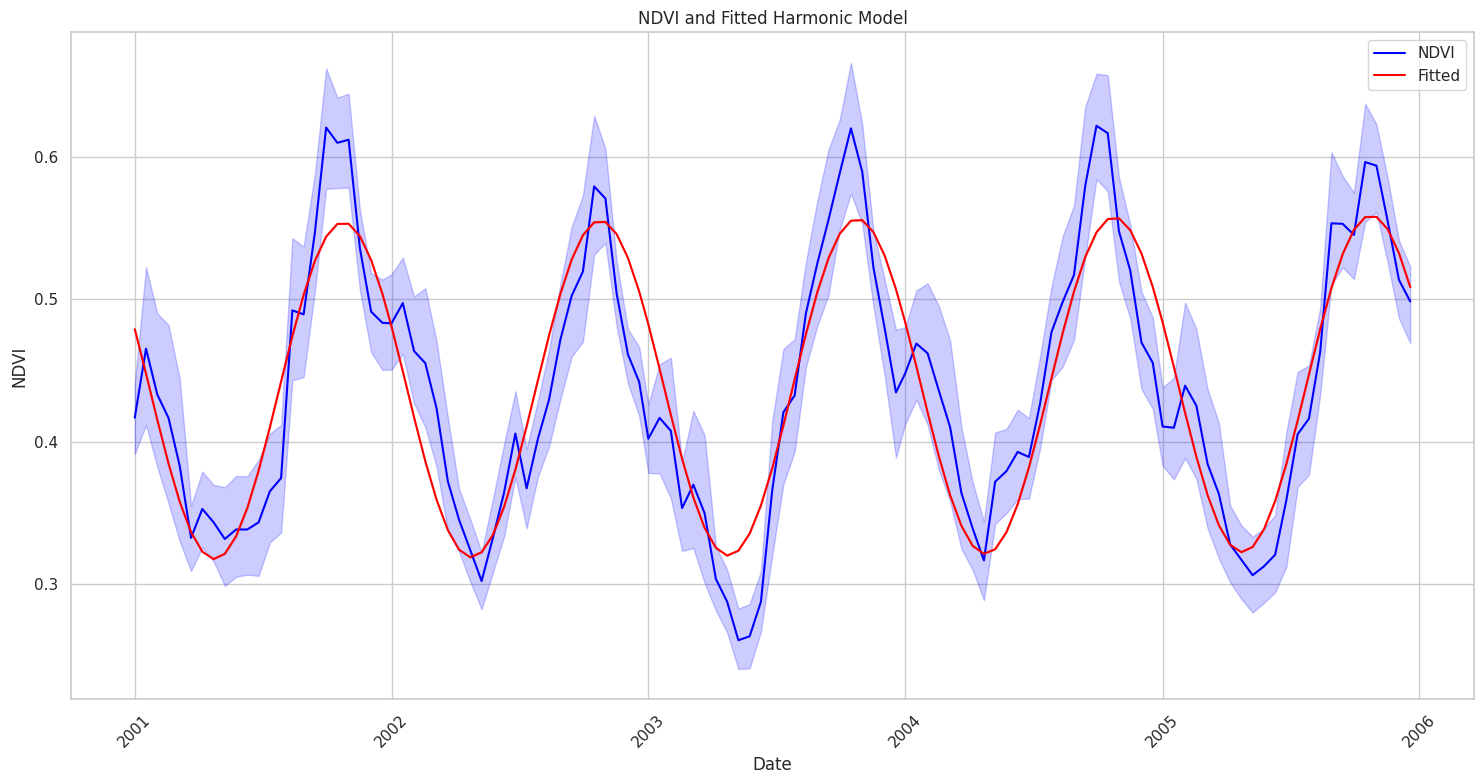

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for NDVI values and the fitted harmonic model
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='mean_ndvi', data=df_mean, color='blue', label='NDVI')
sns.lineplot(x='date', y='fitted', data=df_mean, color='red', label='Fitted')
plt.title("NDVI and Fitted Harmonic Model")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-262-bbb2f3d8516d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bapatla_data_filled['trend'] = model.predict(X)


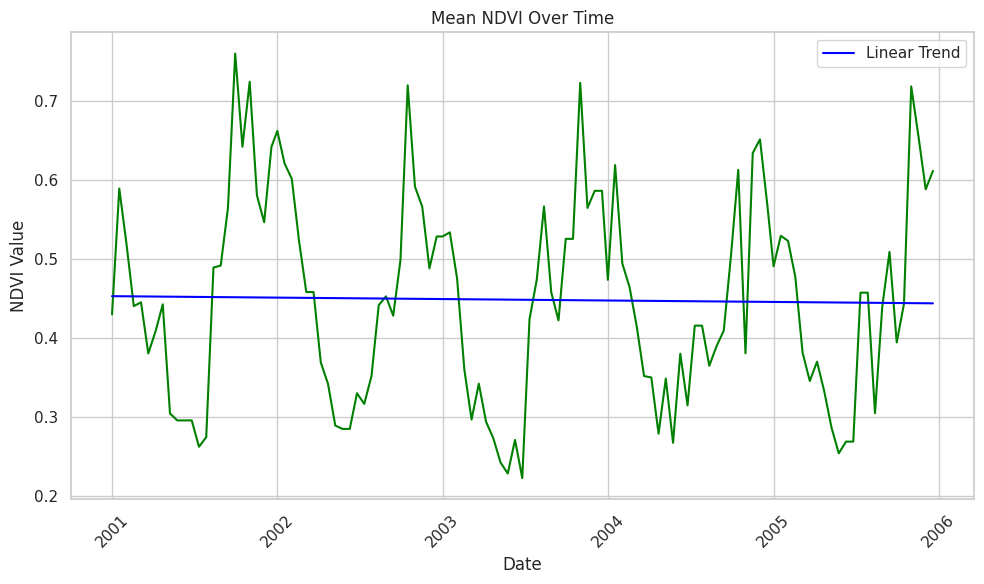

In [ ]:
# Filter the data for the 'Bapatla' district
bapatla_data_filled = df_mean_filled[df_mean_filled['District'] == 'Bapatla']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for mean NDVI values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='mean_ndvi', data=bapatla_data_filled, color='green')

# Add a linear regression smoothing line
# Create a linear regression model
X = (bapatla_data_filled['date'] - bapatla_data_filled['date'].min()).dt.days.values.reshape(-1, 1)
y = bapatla_data_filled['mean_ndvi'].values
model = LinearRegression().fit(X, y)
bapatla_data_filled['trend'] = model.predict(X)

# Plot the trend line
sns.lineplot(x='date', y='trend', data=bapatla_data_filled, color='blue', label='Linear Trend')

plt.title("Mean NDVI Over Time")
plt.xlabel("Date")
plt.ylabel("NDVI Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Filter the data for the 'Bapatla' district
Bapatla = df_mean_filled[df_mean_filled['District'] == 'Bapatla'].copy()

# Drop the 'District' column
Bapatla = Bapatla.drop(columns=['District'])

# Display the first few rows of the DataFrame
print(Bapatla.head())


          date  mean_ndvi
460 2001-01-01   0.429911
461 2001-01-17   0.589020
462 2001-02-02   0.518484
463 2001-02-18   0.440314
464 2001-03-06   0.445103


In [ ]:
# Ensure the 'date' column is in datetime format
Bapatla['date'] = pd.to_datetime(Bapatla['date'])

# Set the 'date' column as the index
Bapatla.set_index('date', inplace=True)

# Create a time series object
NDVI_tsdata = Bapatla['mean_ndvi']

# Print the time series data
print(NDVI_tsdata.head())

# Print the class of the time series data
print(type(NDVI_tsdata))


date
2001-01-01    0.429911
2001-01-17    0.589020
2001-02-02    0.518484
2001-02-18    0.440314
2001-03-06    0.445103
Name: mean_ndvi, dtype: float64
<class 'pandas.core.series.Series'>


date
2001-01-01         NaN
2001-01-17    0.512472
2001-02-02    0.515939
2001-02-18    0.467967
2001-03-06    0.421940
Name: mean_ndvi, dtype: float64
date
2001-01-01    0.429911
2001-01-17    0.589020
2001-02-02    0.518484
2001-02-18    0.440314
2001-03-06    0.445103
Name: mean_ndvi, dtype: float64


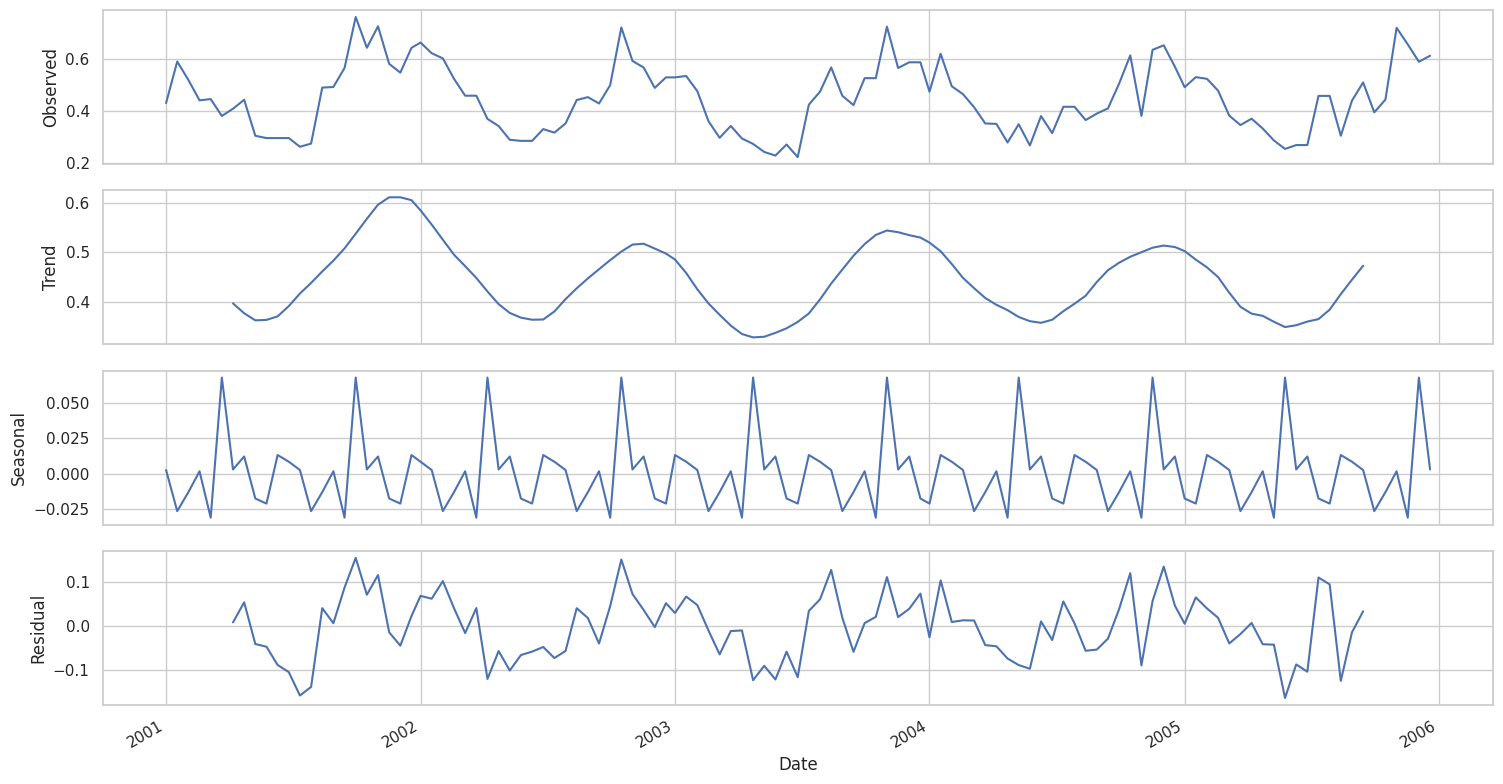

In [ ]:
# Calculate the moving average
sma = NDVI_tsdata.rolling(window=3, center=True).mean()

# Print the moving average and original time series data
print(sma.head())
print(NDVI_tsdata.head())

# Perform classical seasonal decomposition by moving averages
decomposition = seasonal_decompose(NDVI_tsdata, model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

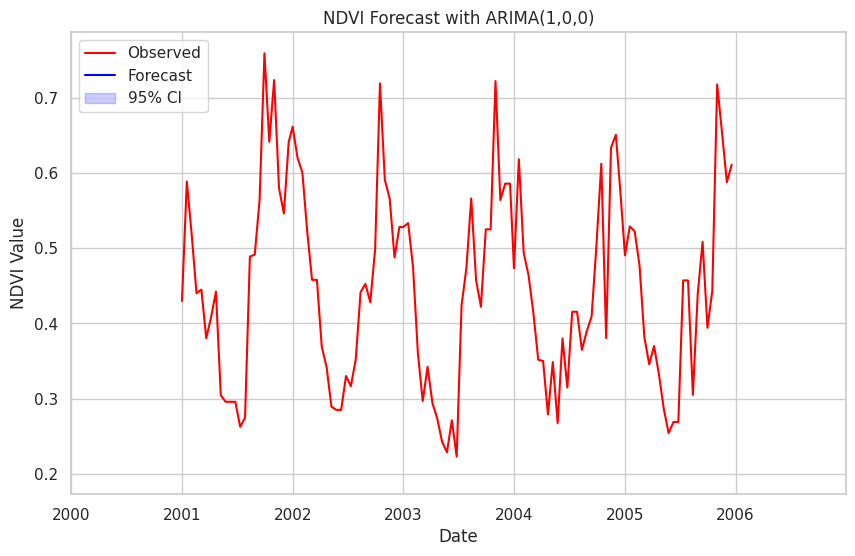

92     0.541288
93     0.520067
94     0.503988
95     0.491804
96     0.482571
97     0.475576
98     0.470275
99     0.466258
100    0.463215
101    0.460909
102    0.459161
103    0.457837
104    0.456834
105    0.456074
106    0.455498
107    0.455061
108    0.454731
109    0.454480
110    0.454290
111    0.454146
112    0.454037
113    0.453955
114    0.453892
Name: predicted_mean, dtype: float64


In [ ]:
# Define the training data (up to 2004) and test data (2005)
train_data = NDVI_tsdata[:'2004-12']
test_data = NDVI_tsdata['2005-01':]

# Fit ARIMA(1,0,0) model
model = ARIMA(train_data, order=(1, 0, 0))
fit = model.fit()

# Forecast for 2005
forecast_result = fit.get_forecast(steps=len(test_data))
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Prepare to plot the forecast with confidence intervals
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(NDVI_tsdata.index, NDVI_tsdata, label='Observed', color='red')

# Plot the forecast values
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='blue')

# Plot confidence intervals
plt.fill_between(forecast_values.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')

# Labels and title
plt.title('NDVI Forecast with ARIMA(1,0,0)')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.legend()

# Limit the x-axis to 2000 to 2006
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2006-12-31'))

# Display the plot
plt.show()

# Print the forecasted values
print(forecast_values)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

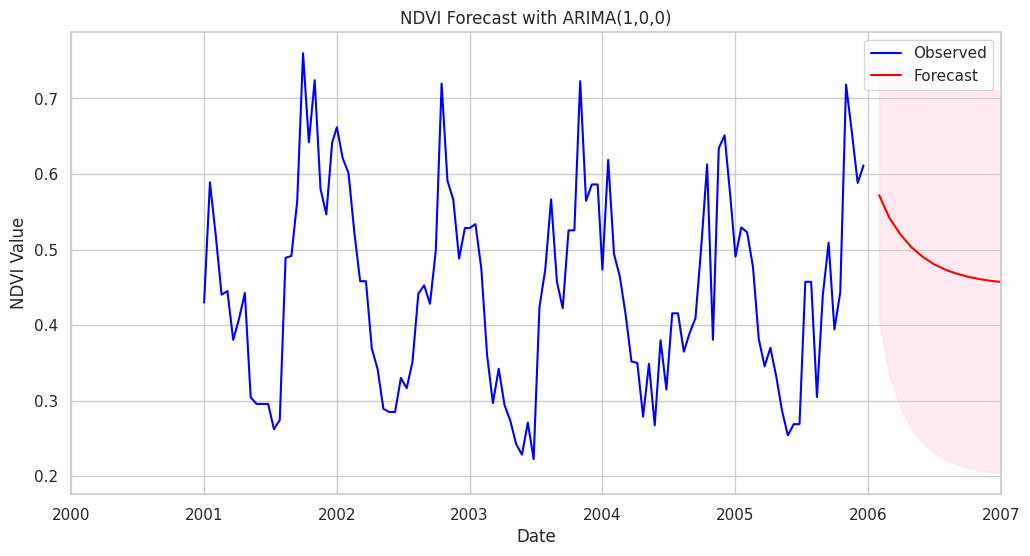

In [ ]:
# Fit ARIMA(1,0,0) model
train_data = NDVI_tsdata[:'2005']
arima_model = ARIMA(train_data, order=(1, 0, 0))
arima_fit = arima_model.fit()

# Predict values
forecast_steps = 12
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train_data.index[-1] + timedelta(days=30), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Extend the index to include forecast period
full_index = train_data.index.append(forecast_index)

# Create a new DataFrame to hold both historical and forecasted values
forecast_df = pd.DataFrame(data={
    'mean_ndvi': np.append(train_data.values, [np.nan] * forecast_steps),
    'forecast': np.append([np.nan] * len(train_data), forecast_values),
    'l95': np.append([np.nan] * len(train_data), forecast_conf_int.iloc[:, 0]),
    'h95': np.append([np.nan] * len(train_data), forecast_conf_int.iloc[:, 1])
}, index=full_index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['mean_ndvi'], label='Observed', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['l95'], forecast_df['h95'], color='pink', alpha=0.3)
plt.title('NDVI Forecast with ARIMA(1,0,0)')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.xlim([pd.Timestamp('2000-01-01'), pd.Timestamp('2007-01-01')])
plt.legend()
plt.show()
